In [1]:
import os
import yaml
from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import make_lupton_rgb

from mejiro.utils import util

# read configuration file
with open('/grad/bwedig/mejiro/projects/pipeline/hwo.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '04')

j_pickles = sorted(glob(os.path.join(data_dir, 'SyntheticImage_*_J.pkl')))  # 'sca*', 
h_pickles = sorted(glob(os.path.join(data_dir, 'SyntheticImage_*_H.pkl')))  # 'sca*', 
k_pickles = sorted(glob(os.path.join(data_dir, 'SyntheticImage_*_K.pkl')))  # 'sca*', 
print(f'Found {len(j_pickles)} pickle(s) in {data_dir}')

Found 100 pickle(s) in /data/bwedig/mejiro/hwo/04


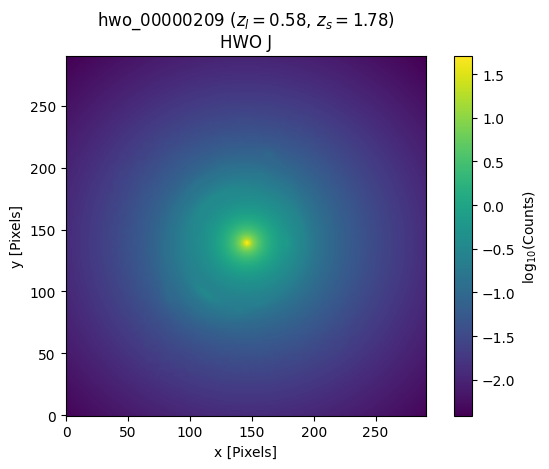

In [4]:
sample = util.unpickle(j_pickles[0])
sample.plot()

In [5]:
rgb_images = []
for j_pickle, h_pickle, k_pickle in tqdm(zip(j_pickles, h_pickles, k_pickles), total=len(j_pickles)):
    j_sample = util.unpickle(j_pickle)
    h_sample = util.unpickle(h_pickle)
    k_sample = util.unpickle(k_pickle)

    rgb_image = make_lupton_rgb(
        k_sample.image, h_sample.image, j_sample.image,
        stretch=1.0, Q=10.0
    )

    rgb_images.append(rgb_image)

100%|██████████| 100/100 [00:56<00:00,  1.76it/s]


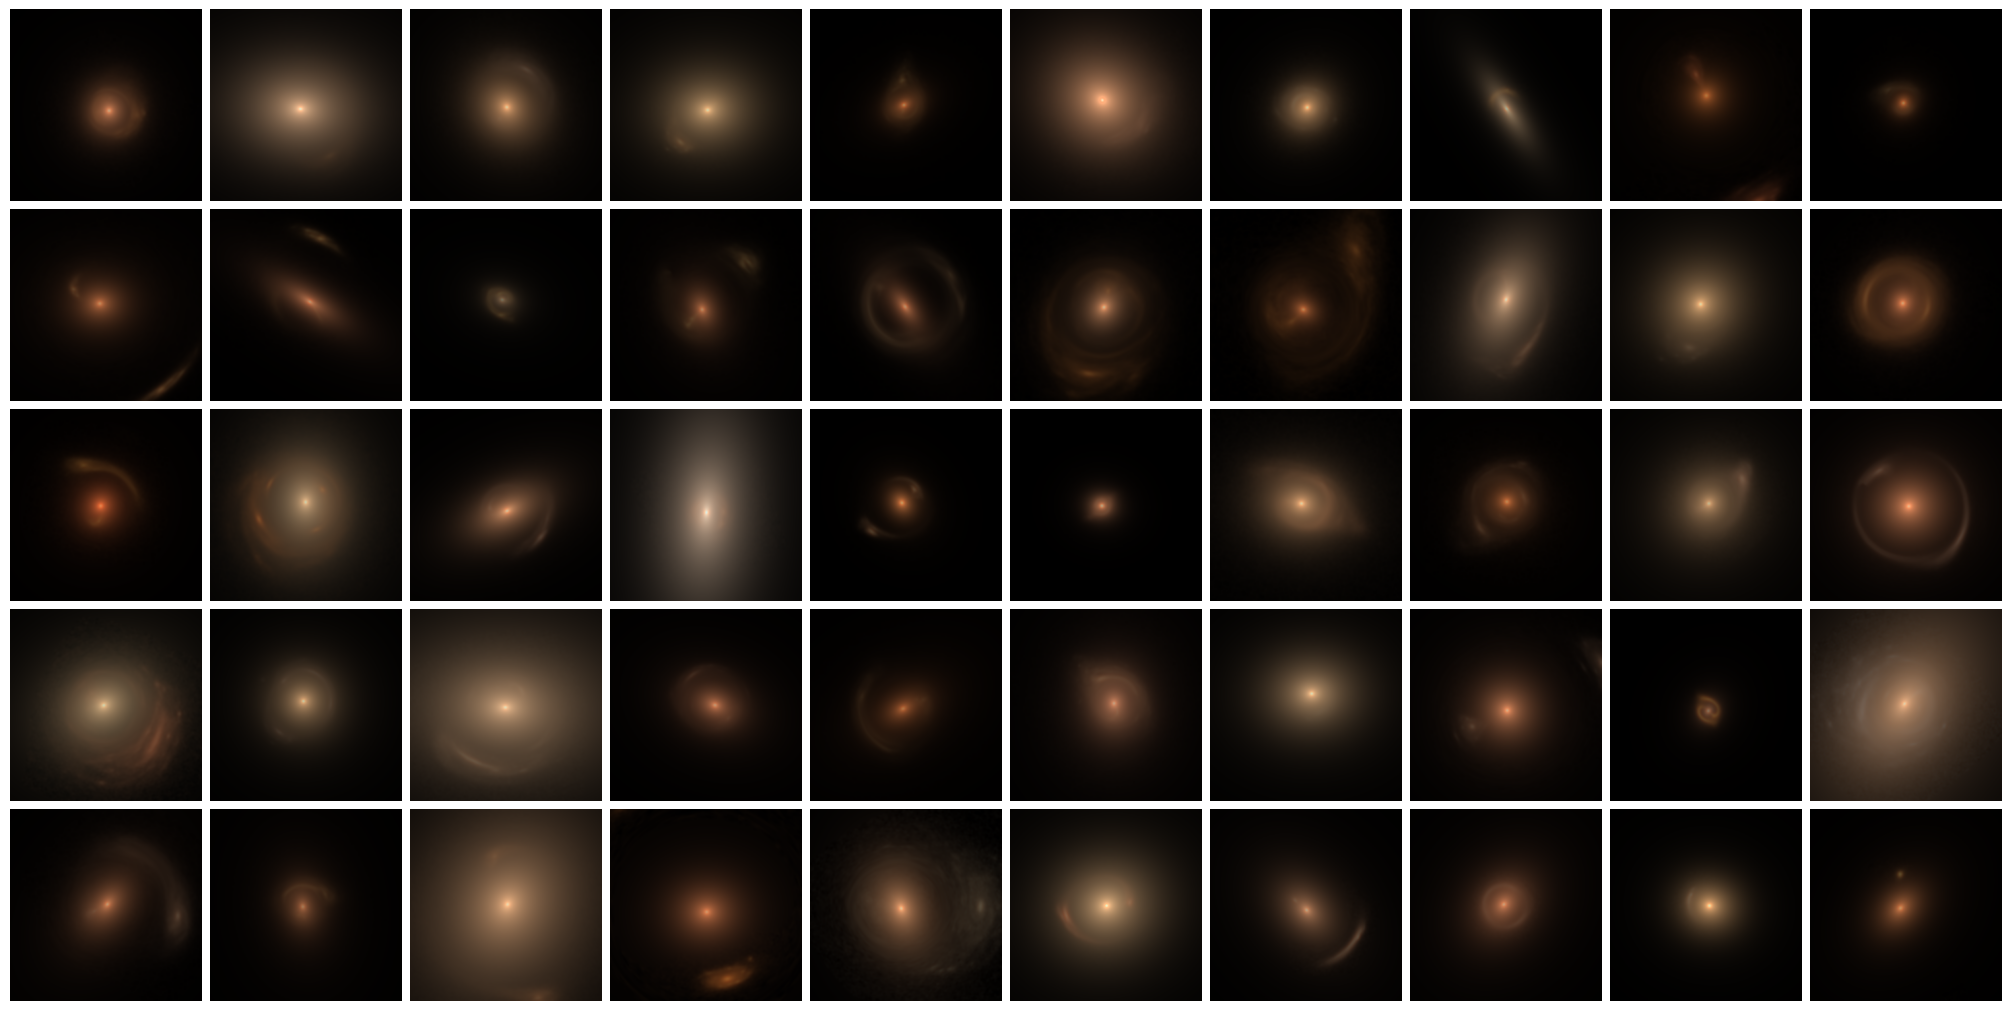

In [11]:
fig, axes = plt.subplots(5, 10, figsize=(20, 10), constrained_layout=True)
for idx, ax in enumerate(axes.flat):
    if idx < len(rgb_images):
        ax.imshow(rgb_images[idx + 24])
        ax.axis('off')
    else:
        ax.axis('off')
# plt.tight_layout()
plt.savefig('/grad/bwedig/mejiro/projects/hwo/figures/rgb_sample.png', dpi=600)
plt.show()